###########################################################################################################

# Actividad 2 - Casos de Dengue
#### Segunda práctica de la asignatura de Machine Learning del Máster Universitario en Big Data y Data Science
#### Hecho por el estudiante:

- Carlos de la Morena Coco

###########################################################################################################

En este notebook, vamos a resolver el ejercicio planteado para intentar predecir el número de casos semanales de dengue dadas unas determinadas circunstancias.

Dado que estamos intentando predecir un número, se trata de un problema de regresión

Los datos han sido obtenidos de [esta](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/) competición de Driven Data

## 1. Definición del problema
Para este dataset, el problema que estamos intentando resolver (o mejor dicho, la preguntaque estamos intentando resolver) es: dadas ciertas circunstancias en una ciudad concreta en una semana del año, cuántos casos de dengue habrá esa semana?



## 2. Datos
Estudiando el dataset de drivendata, podemos apreciar que se trata de una serie temporal. esto quiere decir que hay un atributo de tiempo en el dataset.

En este caso, son datos históricos de dengue, incluyendo campos como la fecha del inicio de semana, el número de casos y condiciones climáticas como la temperatura del aire, la humedad, las precipitaciones, etc.

Tenemos 3 datasets:
1. **dengue_features_train.csv** - información histórica en dos ciudades sobre las condiciones climáticas, cada semana desde el 30 de abril de 1990 hasta el 25 de junio de 2010. Tenemos 1456 muestras con 24 atributos cada una.
2. **dengue_labels_train.csv** - las etiquetas correspondientes a las muestras del archivo nombrado anteriormente.
3. **dengue_features_test.csv** - este archivo es similar al primero, conteniendo entradas de las mismas características pero desde el 29 de abril de 2008 hasta el 25 de junio de 2013. Las muestras que coinciden en tiempo con el primer archivo pertenecen a otra ciudad, de forma que no hay muestras repetidas.

## 3. Evaluación
Para este problema, [DrivenData ha seleccionado el error medio absoluto (MAE por sus siglas en inglés)](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/submissions/)(ver apartado "Primary Evaluation Metric"). Como es lo propio en las evaluaciones de regresión, nuestro objetivo será minimizar este error lo máximo posible.

Para evaluar nuestro modelo, calcularemos el MAE y lo compararemos con los demás resultados de la [leaderboard](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/leaderboard/)

## 4. Parámetros

Los parámetros son las distintas partes de los datos. En este paso, intentaremos saber lo todo lo que podamos sobre nuestros datos.

Para este dataset, DrivenData nos ofrece un [diccionario de datos](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/), en el cual nos explica el significado de cada atributo.

### Importación de datos y preparación para la modelación

In [2]:
# Importación de herramientas de análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ahora que tenemos nuestras herramientas de análisis de datos preparadas, podemos importar los datos y empezar a explorarlos.

Para este proyecto, hemos [descargado los datos de DrivenData](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/) y los hemos guardado en la carpeta `"dengue_data/"`.

In [3]:
# Importamos el dataset de información histórica y el de las etiquetas correspondientes

df_features = pd.read_csv("dengue_data/dengue_features_train.csv")
df_labels = pd.read_csv("dengue_data/dengue_labels_train.csv")

In [4]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [5]:
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


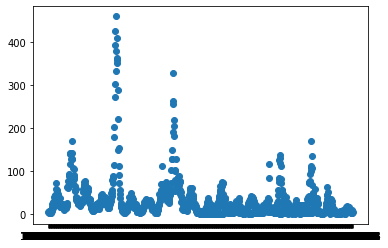

In [6]:
fix, ax = plt.subplots()
ax.scatter(df_features["week_start_date"], df_labels["total_cases"])

<AxesSubplot:ylabel='Frequency'>

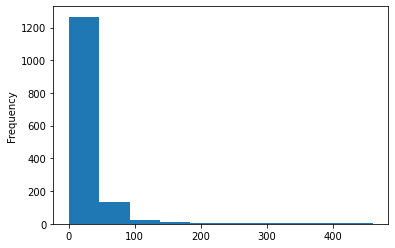

In [7]:
df_labels.total_cases.plot.hist()